# Análisis de Marketing de Clientes

In [ ]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('C:/Users/Lozoronca/Miniconda3451264/Tools/pandas/CustomerIBM/data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.shape

(9134, 24)

In [8]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [10]:
# Obtenga el número total de clientes que han respondido.
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

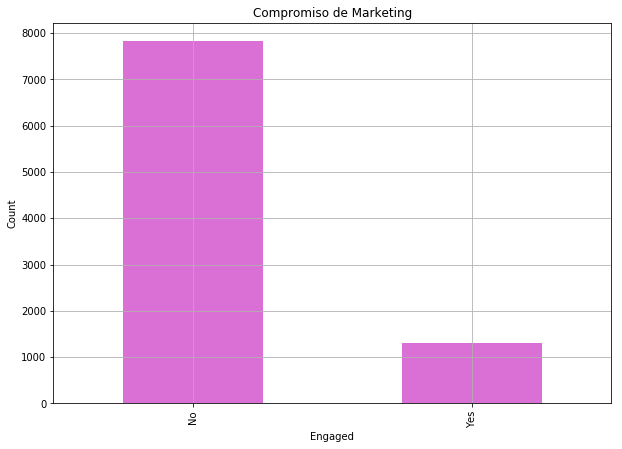

In [12]:
# Visualiza esto en un diagrama de barras.
ax = df.groupby('Response').count()['Customer'].plot(
kind='bar',
color='orchid',
grid=True,
figsize=(10, 7),
title='Compromiso de Marketing'
)
ax.set_xlabel('Engaged')
ax.set_ylabel('Count')
plt.show()

In [13]:
# Calcula los porcentajes de los clientes comprometidos y no comprometidos.
df.groupby('Response').count()['Customer']/df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

In [14]:
# Obtenga las tasas de participación por tipo de oferta de renovación
by_offer_type_df = df.loc[
df['Response'] == 'Yes', # cuenta solo clientes comprometidos
].groupby([
'Renew Offer Type'# Clientes comprometidos agrupados por tipo de oferta de renovación.
]).count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']
by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

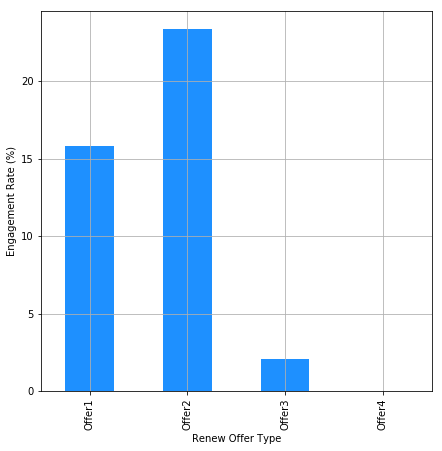

In [15]:
# Visualiza en un gráfico de barras
ax = (by_offer_type_df*100.0).plot(
kind='bar',
figsize=(7, 7),
color='dodgerblue',
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

In [16]:
by_offer_type_df = df.loc[
df['Response'] == 'Yes' # clientes comprometidos
].groupby([
'Renew Offer Type', 'Vehicle Class' # Agrupando los datos por estas dos columnas.
]).count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']# tasas para cada grupo 
by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [17]:
# Hacer que la salida anterior sea más legible usando la función de desapilar
# para girar los datos y extraer y transformar los grupos de nivel interno en columnas
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


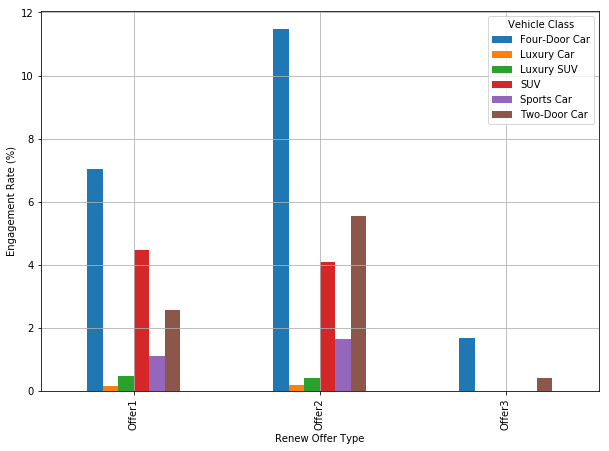

In [18]:
# Visualizar en gráfico de barras
ax = (by_offer_type_df*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

In [19]:
by_sales_channel_df = df.loc[
df['Response'] == 'Yes'
].groupby([
'Sales Channel'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']
by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

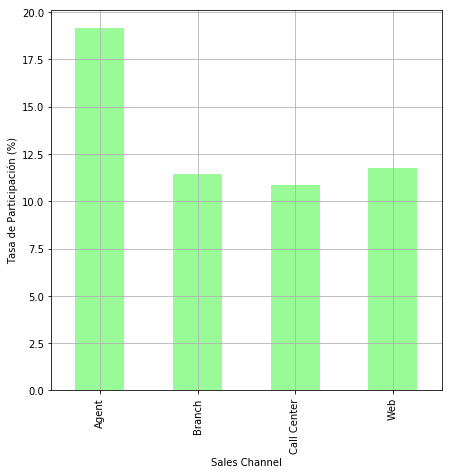

In [20]:
ax = (by_sales_channel_df*100.0).plot(
kind='bar',
figsize=(7, 7),
color='palegreen',
grid=True
)
ax.set_ylabel('Tasa de Participación (%)')
plt.show()

In [21]:
by_sales_channel_df = df.loc[
df['Response'] == 'Yes'
].groupby([
'Sales Channel', 'Vehicle Size'
]).count()['Customer'] / df.groupby('Sales Channel').count()['Customer']
by_sales_channel_df

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [24]:
# Desapilar los datos en un formato más visible.
by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


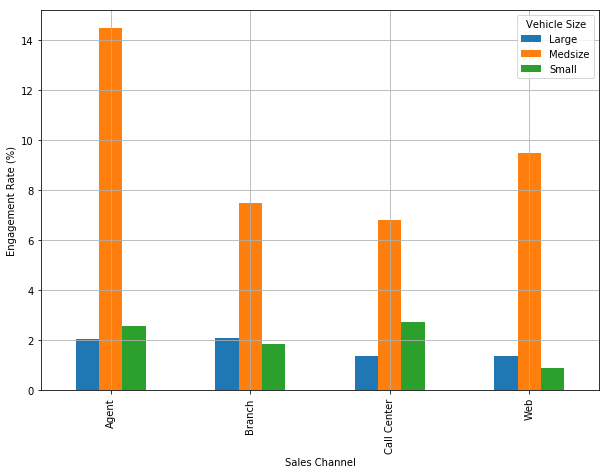

In [25]:
ax = (by_sales_channel_df*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

In [26]:
by_months_since_inception_df = df.loc[
df['Response'] == 'Yes'
].groupby(
by='Months Since Policy Inception'
)['Response'].count() / df.groupby(
by='Months Since Policy Inception'
)['Response'].count() * 100.0
by_months_since_inception_df.fillna(0)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
5      6.896552
6      0.000000
7      7.594937
8      7.407407
9     18.750000
10    15.789474
11    17.307692
12     6.000000
13    14.814815
14     0.000000
15    22.018349
16     0.000000
17    11.881188
18    13.333333
19    16.981132
20    11.650485
21    11.428571
22    12.903226
23    20.454545
24    21.951220
25    13.483146
26    15.000000
27    12.371134
28    17.475728
29    12.244898
        ...    
70    23.529412
71    12.000000
72    23.762376
73     6.818182
74    19.780220
75     6.122449
76     6.976744
77    18.947368
78     7.317073
79    11.881188
80    16.438356
81    15.789474
82     0.000000
83    24.000000
84     6.000000
85    14.117647
86     0.000000
87     7.894737
88     7.894737
89    18.556701
90    14.285714
91     8.000000
92    16.216216
93    26.666667
94    25.000000
95    15.584416
96    17.910448
97     0.000000
98     0.000000
99     7.6

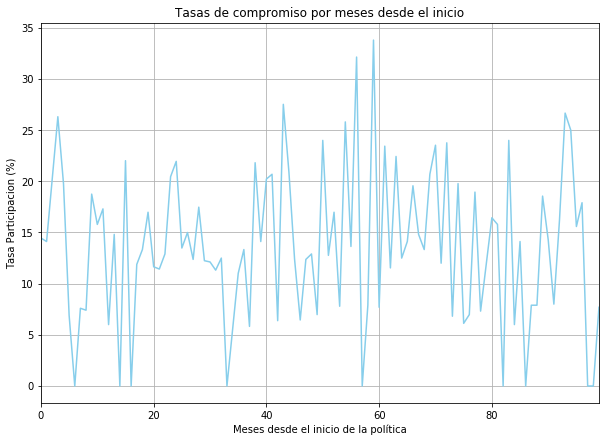

In [27]:
ax = by_months_since_inception_df.fillna(0).plot(
figsize=(10, 7),
title='Tasas de compromiso por meses desde el inicio',
grid=True,
color='skyblue'
)
ax.set_xlabel('Meses desde el inicio de la política')
ax.set_ylabel('Tasa Participacion (%)')
plt.show()